# Task-Customer Churn Prediction

# import libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
data=pd.read_csv('Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [3]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# Exploratory Data Analysis (EDA)

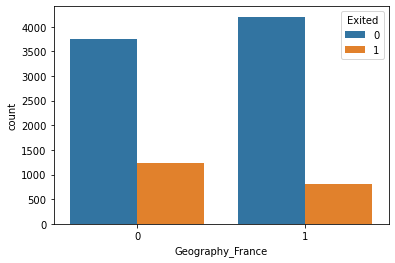

In [29]:
sns.countplot(x='Geography_France',hue='Exited',data=data)
plt.show()

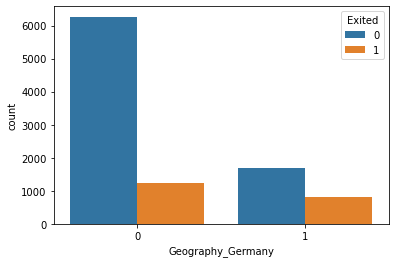

In [34]:
sns.countplot(x='Geography_Germany',hue='Exited',data=data)
plt.show()

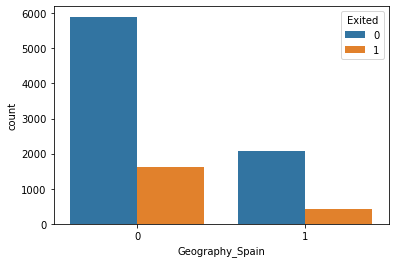

In [35]:
sns.countplot(x='Geography_Spain',hue='Exited',data=data)
plt.show()

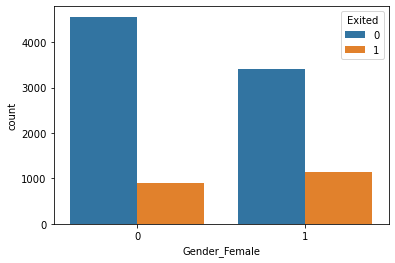

In [32]:
sns.countplot(x='Gender_Female',hue='Exited',data=data)
plt.show()

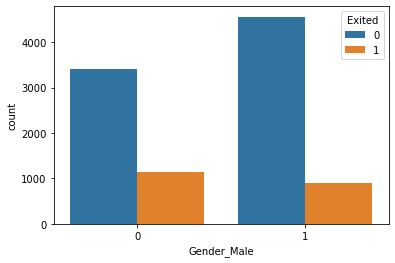

In [33]:
sns.countplot(x='Gender_Male',hue='Exited',data=data)
plt.show()

In [6]:
data = pd.get_dummies(data, columns=['Gender','Geography'])
order = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Gender_Female',
       'Gender_Male', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Exited']
data = data[order]
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,Exited
0,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,1,0,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,1,0,1,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,1,0,0,0,1,0


# features and labels

In [8]:
X = data.drop(columns=['Exited'])
y = data['Exited']

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# dataset splitting

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=43)

# logistic regression model

In [18]:
model = LogisticRegression()

In [19]:
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
y_pred=model.predict(X_test)
pred=pd.DataFrame(y_pred)
print(pred)

      0
0     1
1     0
2     1
3     0
4     0
...  ..
1995  0
1996  0
1997  0
1998  0
1999  0

[2000 rows x 1 columns]


In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89      1588
           1       0.60      0.21      0.31       412

    accuracy                           0.81      2000
   macro avg       0.71      0.59      0.60      2000
weighted avg       0.78      0.81      0.77      2000



In [22]:
precision_score(y_test,y_pred)

0.5985915492957746

In [23]:
accuracy_score(y_test,y_pred)

0.808

In [26]:
recall_score(y_test,y_pred)

0.20631067961165048

In [27]:
f1_score(y_test,y_pred)

0.30685920577617326

In [13]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89      1588
           1       0.60      0.21      0.31       412

    accuracy                           0.81      2000
   macro avg       0.71      0.59      0.60      2000
weighted avg       0.78      0.81      0.77      2000

